# DAT210x - Programming with Python for DS

## Module4- Lab3

This code is intentionally missing! Read the directions on the course lab page!

In [1]:
# .. your code here ..
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:
# Look pretty...
%matplotlib inline
# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

In [3]:
def scaleFeaturesDF(df):
    # Feature scaling is a type of transformation that only changes the
    # scale, but not number of features. Because of this, we can still
    # use the original dataset's column names... so long as we keep in
    # mind that the _units_ have been altered:

    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    
    print("New Variances:\n", scaled.var())
    print("New Describe:\n", scaled.describe())
    return scaled

In [4]:
def drawVectors(transformed_features, components_, columns, plt, scaled):
    if not scaled:
        return plt.axes() # No cheating ;-)

    num_columns = len(columns)

    # This funtion will project your *original* feature (columns)
    # onto your principal component feature-space, so that you can
    # visualize how "important" each one was in the
    # multi-dimensional scaling

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ## visualize projections

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

    ax = plt.axes()

    for i in range(num_columns):
        # Use an arrow to project each original feature as a
        # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

In [5]:
scaleFeatures = True

In [6]:
df = pd.read_csv('./Datasets/kidney_disease.csv', header = 0)
df = df.dropna(axis=0)

labels = ['red' if i=='ckd' else 'green' for i in df.classification]
col_names = ['id', 'classification', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

df = df.drop(labels = col_names, axis =1)
df1 = df.apply(pd.to_numeric, args = ('coerce', ))

In [7]:
df1.var()

age     2.406297e+02
bp      1.248891e+02
sg      3.023865e-05
al      1.996936e+00
su      6.616141e-01
bgr     4.217182e+03
bu      2.246322e+03
sc      9.471717e+00
sod     5.609143e+01
pot     1.208501e+01
hemo    8.307100e+00
pcv     8.290402e+01
wc      9.777380e+06
rc      1.039104e+00
dtype: float64

In [8]:
df1.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,49.563291,74.050633,1.019873,0.797468,0.253165,131.341772,52.575949,2.188608,138.848101,4.636709,13.687342,41.917722,8475.949367,4.891772
std,15.512244,11.175381,0.005499,1.413130,0.813397,64.939832,47.395382,3.077615,7.489421,3.476351,2.882204,9.105164,3126.880181,1.019364
min,6.000000,50.000000,1.005000,0.000000,0.000000,70.000000,10.000000,0.400000,111.000000,2.500000,3.100000,9.000000,3800.000000,2.100000
25%,39.250000,60.000000,1.020000,0.000000,0.000000,97.000000,26.000000,0.700000,135.000000,3.700000,12.600000,37.500000,6525.000000,4.500000
50%,50.500000,80.000000,1.020000,0.000000,0.000000,115.500000,39.500000,1.100000,139.000000,4.500000,14.250000,44.000000,7800.000000,4.950000
75%,60.000000,80.000000,1.025000,1.000000,0.000000,131.750000,49.750000,1.600000,144.000000,4.900000,15.775000,48.000000,9775.000000,5.600000
max,83.000000,110.000000,1.025000,4.000000,5.000000,490.000000,309.000000,15.200000,150.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [11]:
if scaleFeatures: df = scaleFeaturesDF(df1)

New Variances:
 age     1.006369
bp      1.006369
sg      1.006369
al      1.006369
su      1.006369
bgr     1.006369
bu      1.006369
sc      1.006369
sod     1.006369
pot     1.006369
hemo    1.006369
pcv     1.006369
wc      1.006369
rc      1.006369
dtype: float64
New Describe:
                 age            bp            sg            al            su  \
count  1.580000e+02  1.580000e+02  1.580000e+02  1.580000e+02  1.580000e+02   
mean   1.032929e-16  7.406171e-16 -1.624580e-15 -7.757508e-16 -2.108018e-18   
std    1.003180e+00  1.003180e+00  1.003180e+00  1.003180e+00  1.003180e+00   
min   -2.817246e+00 -2.158952e+00 -2.713365e+00 -5.661221e-01 -3.122333e-01   
25%   -6.669624e-01 -1.261282e+00  2.309247e-02 -5.661221e-01 -3.122333e-01   
50%    6.057713e-02  5.340564e-01  2.309247e-02 -5.661221e-01 -3.122333e-01   
75%    6.749439e-01  5.340564e-01  9.352451e-01  1.437770e-01 -3.122333e-01   
max    2.162358e+00  3.227064e+00  9.352451e-01  2.273474e+00  5.854375e+00   

    

In [13]:
pca = PCA(n_components =2)
pca.fit(df)
T = pca.transform(df)

Features by importance:
 [(3.4336278896161083, 'bgr'), (3.233806932188047, 'sc'), (3.1862889655585156, 'bu'), (3.1226215240866533, 'su'), (3.0756029035694414, 'pcv'), (3.062948518962919, 'hemo'), (3.00259239563645, 'al'), (2.7990468891736593, 'sg'), (2.7327769657650536, 'rc'), (2.4238681788081027, 'sod'), (2.236506269466894, 'age'), (2.147058303747439, 'wc'), (1.7017683320956671, 'bp'), (1.0563823537406802, 'pot')]


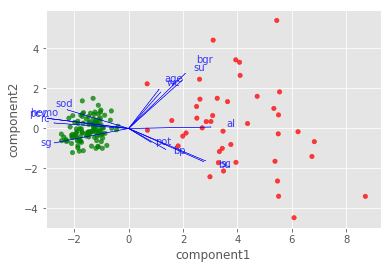

In [14]:
ax = drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)
plt.show();